# Heart Disease Classifier
Vyom Devgan

My Objective was 3 things:
1. Make models that predict if a given person has heart disease.
2. Find the best model. (Best accuracy and High Recall)
3. Comparing a clean and prepped dataset against and uncleaned

#### Imports
I used a variety of libraries for making the models
1. Pandas
2. Numpy
3. Matplotlib
4. Seaborn
5. Sklearn
6. IMBLearn
7. Keras

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing all Scikit-learn libraries and funcitons
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

from keras.models import Sequential
from keras.layers import Dense

### Seed
Since we want consisnt results, I set all the seeds as per the requirements of the project.

In [2]:
# Setting Seed
np.random.seed(7)
SEED = 7

### Dataset
The dataset was provided. It consists of 13 Independent Variables and 1 Dependent Varaible, which is the target.

In [3]:
# Load the dataset
og_df = pd.read_csv('heartdataset.csv') # Use this as uncleaned, unpreped data.
df = pd.read_csv('heartdataset.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Visualization
Before begining let's look at some graphs that maybe useful

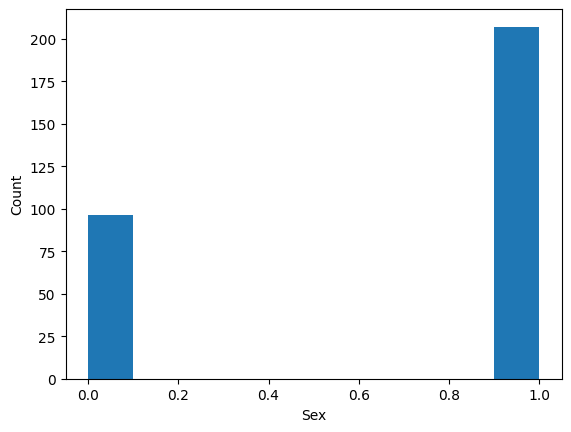

In [8]:
plt.hist(df['sex'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

This graph did not look good hence I remade it using Seaborns count plot

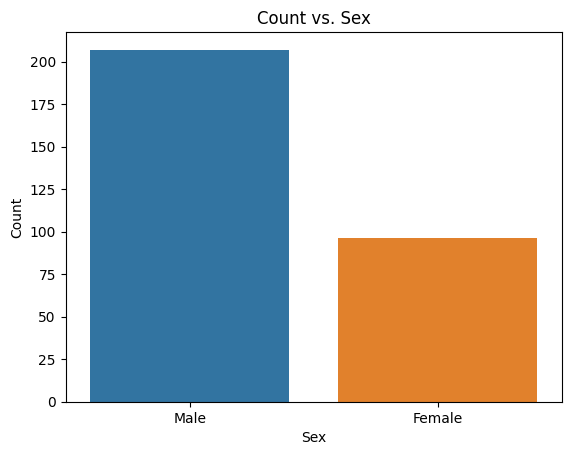

In [9]:
df_copy = df.copy()
df_copy['sex'] = df_copy['sex'].replace(0, 'Female')
df_copy['sex'] = df_copy['sex'].replace(1, 'Male')
sns.countplot(data=df_copy, x='sex').set(title='Count vs. Sex', xlabel='Sex',ylabel='Count')
plt.show()

There is a big difference in the representation of feamles and males.

In [10]:
males = len(df_copy[df_copy.sex=='Male']) / (len(df_copy.sex))
females = len(df_copy[df_copy.sex=='Female']) / (len(df_copy.sex))
print(males, females, males/females)

0.6831683168316832 0.31683168316831684 2.15625


This means 68.316% of the data is males, while 31.683% is females. Data represents 2.15 times more men than women.

C:\Users\vyomd\AppData\Local\Temp\ipykernel_18996\996618399.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.columns, fontsize=10, rotation=90)
C:\Users\vyomd\AppData\Local\Temp\ipykernel_18996\996618399.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df.columns, fontsize=10)


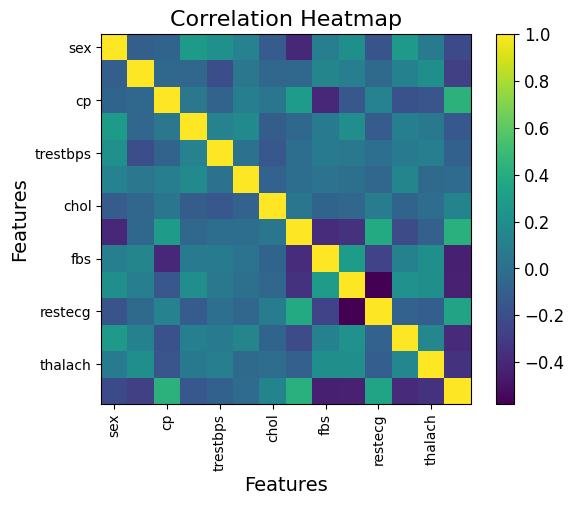

In [11]:
# Creating a heatmap
fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix)

# Adding sidebar/colorbar
cbar = plt.colorbar(heatmap, ax=ax)
cbar.ax.tick_params(labelsize=12)

# Tick labels
ax.set_xticklabels(df.columns, fontsize=10, rotation=90)
ax.set_yticklabels(df.columns, fontsize=10)

# Title and Axis labels
ax.set_title('Correlation Heatmap', fontsize=16)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Features', fontsize=14)

plt.show()

1    165
0    138
Name: target, dtype: int64


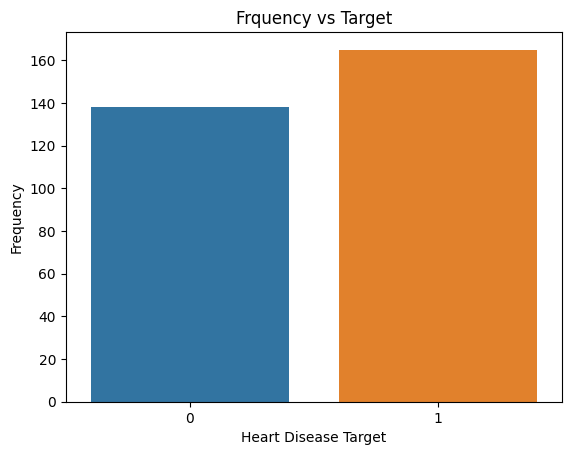

In [12]:
sns.countplot(data=df,x='target').set(title='Frquency vs Target', xlabel='Heart Disease Target',ylabel='Frequency')
print(df.target.value_counts())
plt.show()

There is an imbalance in the target that I dealt with later using the upsampling with SMOTE.

### Preperation
Before making and fitting any models we need to prepare the data so we need to achieve by splitting it into training and testing sets, and separating the features and target variables. Using the Sklearn library I was able to use the 'train_test_split' to split the data into training and testing sets

In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df = df.drop_duplicates() # If duplicates exist, drop them, otherwise the same dataset is returned.

In [15]:
#Getting Dummy variables
df_dummies = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [16]:
#Scaling Dummy variables
sc = StandardScaler()
df_scaled = sc.fit_transform(df_dummies[['age','trestbps', 'chol','thalach', 'oldpeak']])
df_scaled = pd.DataFrame(df_scaled, columns=['age','trestbps', 'chol','thalach', 'oldpeak'])

In [17]:
df_dummies = df_dummies.drop(columns=['age','trestbps', 'chol','thalach', 'oldpeak']) # Dropping irrelevant columns

In [18]:
df_scaled = pd.concat([df_scaled.reset_index(drop=True),df_dummies.reset_index(drop=True)], axis=1)

In [19]:
# Using SMOTE to upsample the target to match.
smote = SMOTE(sampling_strategy='minority', random_state=SEED)

X_pre, y_pre = smote.fit_resample(df_scaled.drop(columns=['target']),df_scaled['target'])
df = pd.concat([pd.DataFrame(y_pre), pd.DataFrame(X_pre)], axis=1)
df.target.value_counts()

1    164
0    164
Name: target, dtype: int64

From 138 to 164. Now we have a balanced target.

In [20]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(og_df.drop('target', axis=1), og_df['target'], test_size=0.2, random_state=SEED)

# Splitting data into training, testing and validation sets using the cleaned and preped dataset.
X_train_prep, X_test_prep, y_train_prep, y_test_prep = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=SEED)
X_train_prep, X_val_prep, y_train_prep, y_val_prep = train_test_split(X_train_prep, y_train_prep, test_size=0.25, random_state=SEED) 

# Separate the features and target variables
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X_train = X_train[features]
X_test = X_test[features]

### Model #1: Random Forest (Non Preped Data)
The first model I made was the Random Forest. I did 3 runs of this model, all with different number of esimators/trees.

In [21]:
# Building the Random Forest model
rf_model_1 = RandomForestClassifier(n_estimators=100, random_state=SEED)
rf_model_2 = RandomForestClassifier(n_estimators=300, random_state=SEED)
rf_model_3 = RandomForestClassifier(n_estimators=500, random_state=SEED)

# Training the model on the training datas
rf_model_1.fit(X_train, y_train)
rf_model_2.fit(X_train, y_train)
rf_model_3.fit(X_train, y_train)

# Making predictions on the testing data
rf_y_pred_1 = rf_model_1.predict(X_test)
rf_y_pred_2 = rf_model_2.predict(X_test)
rf_y_pred_3 = rf_model_3.predict(X_test)

In [22]:
# Printing the model predictors
print(f'The accuracy of the first model with 100 estimators is: {accuracy_score(y_test, rf_y_pred_1)}.\nThe accuracy of the second model with 300 estimators is: {accuracy_score(y_test, rf_y_pred_2)}.\nThe accuracy of the third model with 500 estimators is: {accuracy_score(y_test, rf_y_pred_3)}')

The accuracy of the first model with 100 estimators is: 0.7213114754098361.
The accuracy of the second model with 300 estimators is: 0.7213114754098361.
The accuracy of the third model with 500 estimators is: 0.7377049180327869


In [23]:
# Building the Random Forest model
rf_model_4 = RandomForestClassifier(n_estimators=150, random_state=SEED)
rf_model_5 = RandomForestClassifier(n_estimators=450, random_state=SEED)


# Training the model on the training datas
rf_model_4.fit(X_train, y_train)
rf_model_5.fit(X_train, y_train)


# Making predictions on the testing data
rf_y_pred_4 = rf_model_4.predict(X_test)
rf_y_pred_5 = rf_model_5.predict(X_test)

In [24]:
# Printing the model predictors
print(f'The accuracy of the fourth model with 150 estimators is: {accuracy_score(y_test, rf_y_pred_4)}.\nThe accuracy of the fifth model with 450 estimators is: {accuracy_score(y_test, rf_y_pred_5)}')

The accuracy of the fourth model with 150 estimators is: 0.7049180327868853.
The accuracy of the fifth model with 450 estimators is: 0.7213114754098361


In [25]:
rf_report = classification_report(y_test, rf_y_pred_3)
print(rf_report)
rf_cm = confusion_matrix(y_test, rf_y_pred_3)
print(rf_cm)

              precision    recall  f1-score   support

           0       0.79      0.63      0.70        30
           1       0.70      0.84      0.76        31

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61

[[19 11]
 [ 5 26]]


### Model #1: Random Forest (Preped Data)

In [26]:
# Building the Random Forest model
rf_model_1 = RandomForestClassifier(n_estimators=100, random_state=SEED)
rf_model_2 = RandomForestClassifier(n_estimators=300, random_state=SEED)
rf_model_3 = RandomForestClassifier(n_estimators=500, random_state=SEED)
rf_model_4 = RandomForestClassifier(n_estimators=150, random_state=SEED)
rf_model_5 = RandomForestClassifier(n_estimators=450, random_state=SEED)

# Training the model on the training datas
rf_model_1.fit(X_train_prep, y_train_prep)
rf_model_2.fit(X_train_prep, y_train_prep)
rf_model_3.fit(X_train_prep, y_train_prep)
rf_model_4.fit(X_train_prep, y_train_prep)
rf_model_5.fit(X_train_prep, y_train_prep)

# Making predictions on the testing data
rf_y_pred_1 = rf_model_1.predict(X_test_prep)
rf_y_pred_2 = rf_model_2.predict(X_test_prep)
rf_y_pred_3 = rf_model_3.predict(X_test_prep)
rf_y_pred_4 = rf_model_4.predict(X_test_prep)
rf_y_pred_5 = rf_model_5.predict(X_test_prep)

In [27]:
print(f'The accuracy of the first model with 100 estimators is: {accuracy_score(y_test_prep, rf_y_pred_1)}.\nThe accuracy of the second model with 300 estimators is: {accuracy_score(y_test_prep, rf_y_pred_2)}.\nThe accuracy of the third model with 500 estimators is: {accuracy_score(y_test_prep, rf_y_pred_3)}.\nThe accuracy of the fourth model with 150 estimators is: {accuracy_score(y_test_prep, rf_y_pred_4)}.\nThe accuracy of the fifth model with 450 estimators is: {accuracy_score(y_test_prep, rf_y_pred_5)}')

The accuracy of the first model with 100 estimators is: 0.8484848484848485.
The accuracy of the second model with 300 estimators is: 0.8484848484848485.
The accuracy of the third model with 500 estimators is: 0.8484848484848485.
The accuracy of the fourth model with 150 estimators is: 0.8484848484848485.
The accuracy of the fifth model with 450 estimators is: 0.8484848484848485


In [28]:
rf_report = classification_report(y_test_prep, rf_y_pred_1)
print(rf_report)
rf_cm = confusion_matrix(y_test_prep, rf_y_pred_1)
print(rf_cm)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.86      0.86      0.86        36

    accuracy                           0.85        66
   macro avg       0.85      0.85      0.85        66
weighted avg       0.85      0.85      0.85        66

[[25  5]
 [ 5 31]]


### Results
We can see that the 100 and 300 estimators produced the same result for the unpreped dataset, giving an accuracy of around 72.13%.
</br>
So I tried to get the optimal by running the model again with different estimators. From that I found something interesting, running the model on  provided the same result, where as 150 gave a slightly lower accuracy.
</br>
When I ran the same random forest on the clean and prepped data, I get a much better and desired outcome. All Estimators/Trees gave the exact same outcome of 84.84%. This however, did make me wonder if a single decision would make a significat difference or not. I will test that later.
</br>
By looking at the Confusion Matrix and Recall of the Random Forest on the Prepped data, we can get some promising results.

### Model #2: Neural Network (Non Preped Data)
The second model I made was the Neural Netwrok model. Similar to Random Forest, I did 6 total runs of this model as well. Epochs 10 & Batch Size 16, 32, 64

In [29]:
# Building the neural network model
nn_model_1 = Sequential()
nn_model_1.add(Dense(64, input_dim=len(features), activation='relu'))
nn_model_1.add(Dense(32, activation='relu'))
nn_model_1.add(Dense(1, activation='sigmoid'))

nn_model_2 = Sequential()
nn_model_2.add(Dense(20, input_dim=len(features), activation='relu'))
nn_model_2.add(Dense(10, activation='relu'))
nn_model_2.add(Dense(1, activation='sigmoid'))

nn_model_3 = Sequential()
nn_model_3.add(Dense(32, input_dim=len(features), activation='relu'))
nn_model_3.add(Dense(16, activation='relu'))
nn_model_3.add(Dense(1, activation='sigmoid'))

# Compiling
nn_model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the neural network model on the training data
nn_model_1.fit(X_train, y_train, epochs=100, batch_size=16)
nn_model_2.fit(X_train, y_train, epochs=100, batch_size=16)
nn_model_3.fit(X_train, y_train, epochs=100, batch_size=16)

loss_1, nn_accuracy_1 = nn_model_1.evaluate(X_test, y_test, verbose=0)
loss_2, nn_accuracy_2 = nn_model_2.evaluate(X_test, y_test, verbose=0)
loss_3, nn_accuracy_3 = nn_model_3.evaluate(X_test, y_test, verbose=0)

Epoch 1/100
16/16 [==============================] - 1s 1ms/step - loss: 1.4933 - accuracy: 0.6157
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7809 - accuracy: 0.6281
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6362 - accuracy: 0.6446
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9498 - accuracy: 0.6116
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6210 - accuracy: 0.6901
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5657 - accuracy: 0.7273
Epoch 7/100
16/16 [==============================] - 0s 949us/step - loss: 0.8587 - accuracy: 0.5909
Epoch 8/100
16/16 [==============================] - 0s 951us/step - loss: 0.6532 - accuracy: 0.7107
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5066 - accuracy: 0.7190
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5953 - accuracy: 0.7066
Epoch

In [30]:
print(f'Accuracy on the first test set: {nn_accuracy_1 * 100}%.\nAccuracy on the second test set: {nn_accuracy_2 * 100}%.\nAccuracy on the third test set: {nn_accuracy_3 * 100}%.\n')

Accuracy on the first test set: 73.77049326896667%.
Accuracy on the second test set: 72.13114500045776%.
Accuracy on the third test set: 72.13114500045776%.



### Model #2: Neural Network (Preped Data)

In [31]:
nn_model_1 = Sequential()
nn_model_1.add(Dense(64, input_dim=30, activation='relu'))
nn_model_1.add(Dense(32, activation='relu'))
nn_model_1.add(Dense(1, activation='sigmoid'))

nn_model_2 = Sequential()
nn_model_2.add(Dense(20, input_dim=30, activation='relu'))
nn_model_2.add(Dense(10, activation='relu'))
nn_model_2.add(Dense(1, activation='sigmoid'))

nn_model_3 = Sequential()
nn_model_3.add(Dense(32, input_dim=30, activation='relu'))
nn_model_3.add(Dense(16, activation='relu'))
nn_model_3.add(Dense(1, activation='sigmoid'))

nn_model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

nn_model_1.fit(X_train_prep, y_train_prep, epochs=100, batch_size=16)
nn_model_2.fit(X_train_prep, y_train_prep, epochs=100, batch_size=16)
nn_model_3.fit(X_train_prep, y_train_prep, epochs=100, batch_size=16)

loss_1, nn_accuracy_1 = nn_model_1.evaluate(X_test_prep, y_test_prep, verbose=0)
loss_2, nn_accuracy_2 = nn_model_2.evaluate(X_test_prep, y_test_prep, verbose=0)
loss_3, nn_accuracy_3 = nn_model_3.evaluate(X_test_prep, y_test_prep, verbose=0)

Epoch 1/100
13/13 [==============================] - 1s 1ms/step - loss: 0.6022 - accuracy: 0.7347
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.8520
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.8622
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.8571
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8673
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3063 - accuracy: 0.8673
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2829 - accuracy: 0.8878
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2649 - accuracy: 0.8878
Epoch 9/100
13/13 [==============================] - 0s 980us/step - loss: 0.2494 - accuracy: 0.9031
Epoch 10/100
13/13 [==============================] - 0s 978us/step - loss: 0.2372 - accuracy: 0.9133
Epoch

In [32]:
print(f'Accuracy on the first test set: {nn_accuracy_1 * 100}%.\nAccuracy on the second test set: {nn_accuracy_2 * 100}%.\nAccuracy on the third test set: {nn_accuracy_3 * 100}%.')

Accuracy on the first test set: 83.33333134651184%.
Accuracy on the second test set: 81.81818127632141%.
Accuracy on the third test set: 78.78788113594055%.


### Results
We can see that the unclean data produced unstable results in a large range 35% - 80%.
</br>
I tried to get different results by using 3 different model with different numbers of nodes in the layers. The best performing batchsize was 16, I kept the number of epochs to be 100.
</br>
When ran on the cleaned and prepped data I consistently got accuracies 75% or above.
</br>
Note: The values of the accuracy change everytime as it is really difficult to reproduce the same data from a Neural Network.

### Model #3: Decision Tree (Non Preped Data)
The third model I made was the Decision Tree model. I only had to do 1 tree as doing more, would resemble a Random Forest.

In [33]:
# Building the decision tree model
tree_model = DecisionTreeClassifier()

# Fitting the model to the training data
tree_model.fit(X_train, y_train)

# Predictting the target variable for the test data
tree_y_pred = tree_model.predict(X_test)

# Accuracy of the model
tree_accuracy = accuracy_score(y_test, tree_y_pred)

In [34]:
print('Accuracy of Decision Tree model:', tree_accuracy)

Accuracy of Decision Tree model: 0.7049180327868853


In [35]:
tree_report = classification_report(y_test, tree_y_pred)
print(tree_report)
tree_cm = confusion_matrix(y_test, tree_y_pred)
print(tree_cm)

              precision    recall  f1-score   support

           0       0.80      0.53      0.64        30
           1       0.66      0.87      0.75        31

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.70        61
weighted avg       0.73      0.70      0.70        61

[[16 14]
 [ 4 27]]


### Model #3: Decision Tree (Preped Data)

In [36]:
# Building the decision tree model
tree_model = DecisionTreeClassifier()

# Fitting the model to the training data
tree_model.fit(X_train_prep, y_train_prep)

# Predictting the target variable for the test data
tree_y_pred = tree_model.predict(X_test_prep)

# Accuracy of the model
tree_accuracy = accuracy_score(y_test_prep, tree_y_pred)

In [37]:
print('Accuracy of Decision Tree model (Prep):', tree_accuracy)
tree_report = classification_report(y_test_prep, tree_y_pred)
print(tree_report)
tree_cm = confusion_matrix(y_test_prep, tree_y_pred)
print(tree_cm)

Accuracy of Decision Tree model (Prep): 0.803030303030303
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        30
           1       0.90      0.72      0.80        36

    accuracy                           0.80        66
   macro avg       0.81      0.81      0.80        66
weighted avg       0.82      0.80      0.80        66

[[27  3]
 [10 26]]


### Results
As learned from Random Forest Ensemble, trees from 100 - 500 all provided the same result. Thus I decided to make the Decision Tree model to check for 1 tree and check if the results are similar.
</br>
When the unclean data is fitted on the model, we can see that the difference is not great, only a loss of 2% accuracy.
</br>
A similar result can be seen with the clean and prepped data, although the loss in accuracy is greater than unclean data, it is still not a highly significant difference as the loss is only 4%.
</br>
When comparing the Confusion Matrix and Recall we can see that the single Decision Tree scores higher in Recall and predicts two additional True positive values.

### Model #4: Logistic Regression (Non Preped Data)
The fourth model I made was the Logistic Regression model.

In [38]:
# Building the logistic regression model
log_model = LogisticRegression()

# Fit the model to the training data
log_model.fit(X_train, y_train)

# Predict the target variable for the test data
log_y_pred = log_model.predict(X_test)

d:\Vyom\VENVS\School\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# Calculating accuracy of the model
log_accuracy = accuracy_score(y_test, log_y_pred)
print('Accuracy of Logistic Regression model:', log_accuracy)

# Making a Confusion Matrix
log_cm = confusion_matrix(y_test, log_y_pred)
print(log_cm)

Accuracy of Logistic Regression model: 0.7377049180327869
[[18 12]
 [ 4 27]]


In [40]:
log_report = classification_report(y_test, log_y_pred)
print(log_report)

              precision    recall  f1-score   support

           0       0.82      0.60      0.69        30
           1       0.69      0.87      0.77        31

    accuracy                           0.74        61
   macro avg       0.76      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



### Model #4: Logistic Regression (Preped Data)

In [41]:
log_model = LogisticRegression()

log_model.fit(X_train_prep, y_train_prep)

log_y_pred = log_model.predict(X_test_prep)

log_accuracy = accuracy_score(y_test_prep, log_y_pred)
print('Accuracy of Logistic Regression model:', log_accuracy)

log_cm = confusion_matrix(y_test_prep, log_y_pred)
print(log_cm)
log_report = classification_report(y_test_prep, log_y_pred)
print(log_report)

Accuracy of Logistic Regression model: 0.8181818181818182
[[24  6]
 [ 6 30]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.83      0.83      0.83        36

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.82      0.82      0.82        66



### Results
The Logistic Regression provided me with an accuracy of 73.77% when fitted on the unclean data, which is one of the highest out of all the models which were fitted on the unclean data.
</br>
The clean data however, gives us a high accuracy of 81.81% which ranks third so far. Logistic Regression also has the 3rd highest 

### Model #5: K-Nearest Neighbors (Non Preped Data)
The final model I made was the K-Nearest Neighbors model. I ran the model 3 times with different Neighbors each time.

In [42]:
# Building the KNN model
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_2 = KNeighborsClassifier(n_neighbors=3)
knn_3 = KNeighborsClassifier(n_neighbors=5)
knn_1.fit(X_train, y_train)
knn_2.fit(X_train, y_train)
knn_3.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred_1 = knn_1.predict(X_test)
knn_y_pred_2 = knn_2.predict(X_test)
knn_y_pred_3 = knn_3.predict(X_test)

# Calculate the accuracy of the model
knn_accuracy_1 = accuracy_score(y_test, knn_y_pred_1)
knn_accuracy_2 = accuracy_score(y_test, knn_y_pred_2)
knn_accuracy_3 = accuracy_score(y_test, knn_y_pred_3)

In [43]:
# Printing the accuracy of the model
print(f'Accuracy on the first test set: {knn_accuracy_1 * 100}%.\nAccuracy on the second test set: {knn_accuracy_2 * 100}%.\nAccuracy on the third test set: {knn_accuracy_3 * 100}%.')

# Making a Confusion Matrix
knn_cm_1 = confusion_matrix(y_test, knn_y_pred_1)
knn_cm_2 = confusion_matrix(y_test, knn_y_pred_2)
knn_cm_3 = confusion_matrix(y_test, knn_y_pred_3)
print(knn_cm_1, "\n\n", knn_cm_2,"\n\n", knn_cm_3)

Accuracy on the first test set: 60.65573770491803%.
Accuracy on the second test set: 62.295081967213115%.
Accuracy on the third test set: 55.73770491803278%.
[[14 16]
 [ 8 23]] 

 [[15 15]
 [ 8 23]] 

 [[ 9 21]
 [ 6 25]]


In [44]:
print(classification_report(y_test, knn_y_pred_2))

              precision    recall  f1-score   support

           0       0.65      0.50      0.57        30
           1       0.61      0.74      0.67        31

    accuracy                           0.62        61
   macro avg       0.63      0.62      0.62        61
weighted avg       0.63      0.62      0.62        61



In [45]:
knn_report = classification_report(y_test, knn_y_pred_2)
print(knn_report)
knn_cm = confusion_matrix(y_test, knn_y_pred_2)
print(knn_cm)

              precision    recall  f1-score   support

           0       0.65      0.50      0.57        30
           1       0.61      0.74      0.67        31

    accuracy                           0.62        61
   macro avg       0.63      0.62      0.62        61
weighted avg       0.63      0.62      0.62        61

[[15 15]
 [ 8 23]]


### Model #5: K-Nearest Neighbors (Preped Data)

In [46]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_2 = KNeighborsClassifier(n_neighbors=3)
knn_3 = KNeighborsClassifier(n_neighbors=5)
knn_1.fit(X_train_prep, y_train_prep)
knn_2.fit(X_train_prep, y_train_prep)
knn_3.fit(X_train_prep, y_train_prep)

knn_y_pred_1 = knn_1.predict(X_test_prep)
knn_y_pred_2 = knn_2.predict(X_test_prep)
knn_y_pred_3 = knn_3.predict(X_test_prep)

knn_accuracy_1 = accuracy_score(y_test_prep, knn_y_pred_1)
knn_accuracy_2 = accuracy_score(y_test_prep, knn_y_pred_2)
knn_accuracy_3 = accuracy_score(y_test_prep, knn_y_pred_3)

print(f'Accuracy on the first test set: {knn_accuracy_1 * 100}%.\nAccuracy on the second test set: {knn_accuracy_2 * 100}%.\nAccuracy on the third test set: {knn_accuracy_3 * 100}%.')

Accuracy on the first test set: 80.3030303030303%.
Accuracy on the second test set: 81.81818181818183%.
Accuracy on the third test set: 80.3030303030303%.


In [47]:
knn_report = classification_report(y_test_prep, knn_y_pred_2)
print(knn_report)
knn_cm = confusion_matrix(y_test_prep, knn_y_pred_2)
print(knn_cm)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.83      0.83      0.83        36

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.82      0.82      0.82        66

[[24  6]
 [ 6 30]]


### Results
The KNN model provided me with an accuracy of 62.29% when using 3 neigbors, which was one of the lowest ones thus far for the unclean dataset.
</br>
For the clean dataset, we get identical results as Logistic Regression, when using 3 neighbors.

### Unlabeled Dataset Testing
Assuming the data is unlabeled, I would use KMeans to get the best clusters to predict.

In [48]:
data = pd.read_csv('heartdataset.csv')
column_names = {'age':"",'sex':"",'cp':"",'trestbps':"",'chol':"",'fbs':"",'restecg':"",'thalach':"",'exang':"",'oldpeak':"",'slope':"",'ca':"",'thal':"",'target':""}
data.rename(columns=column_names, inplace=True)
data

,,,,,,,,,,,,,,
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


d:\Vyom\VENVS\School\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Vyom\VENVS\School\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Vyom\VENVS\School\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Vyom\VENVS\School\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Vyom\VENVS\School\Lib\site-packages\sklearn\cluster\_kmeans.py:870: F

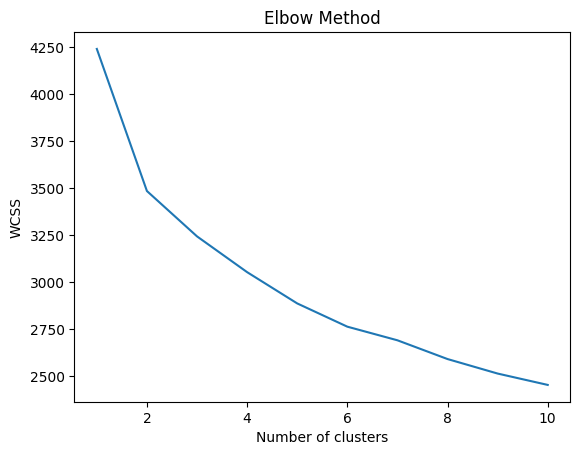

d:\Vyom\VENVS\School\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,,,,,,,,,,,,,,
cluster,,,,,,,,,,,,,,
0,47.101852,0.851852,1.240741,125.694444,227.555556,0.074074,0.694444,165.972222,0.111111,0.428704,1.731481,0.398148,2.277778,0.796296
1,59.037975,0.253165,1.506329,134.354430,265.189873,0.215190,0.417722,150.797468,0.113924,0.664557,1.481013,0.354430,2.025316,0.911392
2,57.948276,0.818966,0.344828,135.284483,250.793103,0.172414,0.448276,133.663793,0.672414,1.863793,1.034483,1.293103,2.543103,0.060345


In [49]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Determine the optimal number of clusters
# For example, using the elbow method
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=SEED)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the K-means algorithm to the preprocessed data
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=SEED)
kmeans.fit(scaled_data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Analyze the clusters
# For example, by computing the mean feature values for each cluster
data['cluster'] = labels
data.groupby('cluster').mean()

### Results
After running this model & plotting the within-cluster sum of squares (WCSS) we can see that is model be useful for identifying patterns and relationships between features. We get the mean feature values for each cluster.

# Conclusion
All in all, after completing this project I am able to report the following:
1. Neural Networks were the best model based on accuracy.
2. A singular Decision Tree was the best model based on Recall.